In [27]:
import pandas as pd

data = pd.read_csv("/content/breast_cancer_survival.csv")

features = data.drop(columns=['Patient_Status'])
target = data['Patient_Status']

print("Features:")
print(features.head())

print("\nTarget:")
print(target.head())


Features:
   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit  
0       20-May-18          26-Aug-18 

In [28]:
import pandas as pd

target_variable = data['Patient_Status']

print("Unique values in the 'Patient_Status' column (Target):")
print(target_variable.unique())


Unique values in the 'Patient_Status' column (Target):
['Alive' 'Dead' nan]


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


data.dropna(inplace=True)

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Tumour_Stage'] = label_encoder.fit_transform(data['Tumour_Stage'])
data['Histology'] = label_encoder.fit_transform(data['Histology'])
data['ER status'] = label_encoder.fit_transform(data['ER status'])
data['PR status'] = label_encoder.fit_transform(data['PR status'])
data['HER2 status'] = label_encoder.fit_transform(data['HER2 status'])
data['Surgery_type'] = label_encoder.fit_transform(data['Surgery_type'])
data['Date_of_Surgery'] = pd.to_datetime(data['Date_of_Surgery'], format='%d-%b-%y')
data['Date_of_Last_Visit'] = pd.to_datetime(data['Date_of_Last_Visit'], format='%d-%b-%y')

X = data.drop(columns=['Patient_Status', 'Date_of_Surgery', 'Date_of_Last_Visit'])
y = data['Patient_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.796875


Accuracy: 0.796875


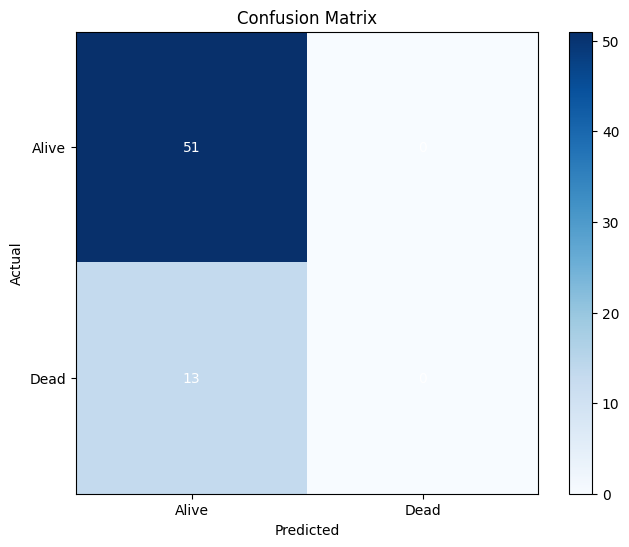

Classification Report:
              precision    recall  f1-score   support

       Alive       0.80      1.00      0.89        51
        Dead       0.00      0.00      0.00        13

    accuracy                           0.80        64
   macro avg       0.40      0.50      0.44        64
weighted avg       0.64      0.80      0.71        64



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data.dropna(inplace=True)

X = data.drop(columns=['Patient_Status', 'Date_of_Surgery', 'Date_of_Last_Visit'])
y = data['Patient_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.yticks([0, 1], ['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
